# 422 Final Project: 
### Sevak Glorikian, Dinor Nallbani, Nabeel Sharif

In [2]:
# Data Manipulation and Linear Algebra
import pandas as pd   # For dataframes and CSV handling
import numpy as np    # For numerical operations and arrays

# Visualization
import matplotlib.pyplot as plt  # Core plotting engine
import seaborn as sns            # Statistical data visualization wrapper
import time                      # For benchmarking model training duration

# Machine Learning - Model Selection & Preprocessing
from sklearn.model_selection import train_test_split, cross_val_score # For splitting data and CV
from sklearn.preprocessing import StandardScaler                      # For feature scaling (z-score normalization)

# Machine Learning - Models
from sklearn.linear_model import LinearRegression        # Baseline linear model
from sklearn.ensemble import RandomForestRegressor       # Non-linear ensemble model

# Machine Learning - Evaluation Metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Configuration
# Set the visual style of seaborn plots to 'whitegrid' for better readability
sns.set(style="whitegrid")

print("Libraries Imported Successfully")

Libraries Imported Successfully


## A. Topic Selection

For this project, we decided on manufacturing quality prediction to run these models on!

## B. Modeling

In [3]:
# Load the dataset
# Note: Ensure the CSV file is located in the same directory as this script
file_name = 'Manufacturing Quality Prediction Data.csv'
df = pd.read_csv(file_name)

# --- Initial Data Inspection ---
print("First 5 rows of the dataset:")
display(df.head()) # Preview data structure

print("\nDataset Info:")
print(df.info())   # Check data types and look for null values

First 5 rows of the dataset:


,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
0,209.762701,8.050855,1688.769167,44522.21707,9.229576e+06,99.999971
1,243.037873,15.812068,3842.931469,63020.76500,1.435537e+07,99.985703
2,220.552675,7.843130,1729.823314,49125.95025,1.072839e+07,99.999758
3,208.976637,23.786089,4970.736918,57128.88155,9.125702e+06,99.999975
4,184.730960,15.797812,2918.345014,38068.20128,6.303792e+06,100.000000



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3957 entries, 0 to 3956
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Temperature (°C)                3957 non-null   float64
 1   Pressure (kPa)                  3957 non-null   float64
 2   Temperature x Pressure          3957 non-null   float64
 3   Material Fusion Metric          3957 non-null   float64
 4   Material Transformation Metric  3957 non-null   float64
 5   Quality Rating                  3957 non-null   float64
dtypes: float64(6)
memory usage: 185.6 KB
None


Summary Statistics:


,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
count,3957.000000,3957.000000,3957.000000,3957.000000,3.957000e+03,3957.000000
mean,200.034704,14.815558,2955.321308,48127.183128,1.003645e+07,96.260179
std,58.135717,5.772040,1458.224940,23812.213513,7.599356e+06,12.992262
min,100.014490,5.003008,513.706875,10156.971960,9.999462e+05,1.000000
25%,150.871296,9.692984,1798.247303,27626.929090,3.433810e+06,99.941129
50%,198.603371,14.832557,2678.277782,44611.452160,7.833390e+06,99.999997
75%,251.366552,19.749680,3929.058261,67805.443850,1.588251e+07,100.000000
max,299.992804,24.999132,7365.018714,103756.181500,2.699783e+07,100.000000


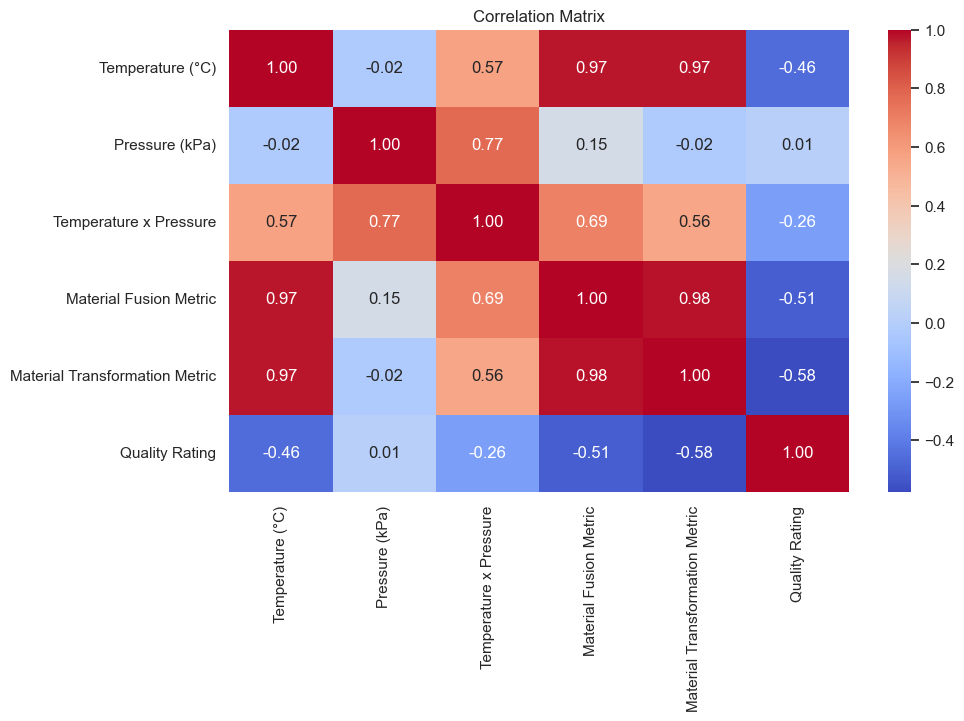

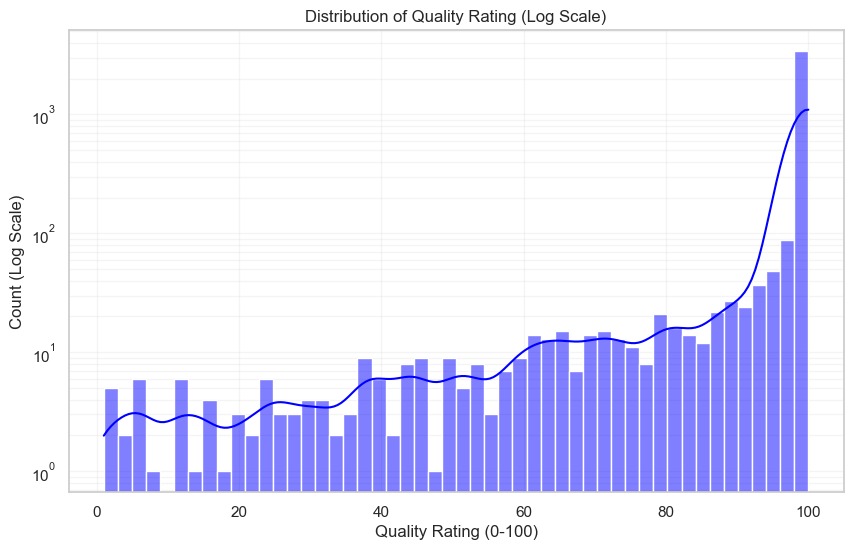

In [4]:
# --- Statistical Summary ---
# Provides Mean, Std Dev, Min/Max, and Quartiles for all numeric columns
print("Summary Statistics:")
display(df.describe())

# --- Visualizing Correlations ---
# A heatmap helps identify which features strongly influence the target 'Quality Rating'
# and if there is multicollinearity between features (e.g., Temp vs Pressure).
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# --- Visualizing Target Distribution ---
# Because Quality Ratings often skew towards the high end (e.g., mostly 99-100),
# a log scale is used on the Y-axis to make the lower frequency outliers visible.
plt.figure(figsize=(10, 6))
sns.histplot(df['Quality Rating'], kde=True, color='blue', bins=50)
plt.yscale('log') # Log scale handles the heavy skew towards 100
plt.title('Distribution of Quality Rating (Log Scale)')
plt.xlabel('Quality Rating (0-100)')
plt.ylabel('Count (Log Scale)')
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.show()

In [5]:
# Define Features (X) and Target (y)
# Drop the target column to isolate features
X = df.drop('Quality Rating', axis=1)
# Isolate the target variable
y = df['Quality Rating']

# Split the data into Training and Testing sets
# test_size=0.2: 20% of data is held back for testing
# random_state=42: Ensures the split is reproducible every time the code runs
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
# Standardize features by removing the mean and scaling to unit variance.
# This is crucial for Linear Regression to ensure coefficients are comparable
# and helps gradient descent converge faster.
scaler = StandardScaler()

# Fit on training set only to prevent data leakage, then transform both
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")

Training Data Shape: (3165, 5)
Testing Data Shape: (792, 5)


### Linear Regression Model

In [6]:
# Initialize the model
lr_model = LinearRegression()

# Start Timer to measure computational cost
start_time = time.time()

# Train the model on the scaled training data
lr_model.fit(X_train_scaled, y_train)

# End Timer
end_time = time.time()
lr_training_time = end_time - start_time

# Generate predictions on the unseen test set
y_pred_lr = lr_model.predict(X_test_scaled)

# --- Evaluation Metrics ---
# RMSE: Root Mean Squared Error (penalizes large errors heavily)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
# MAE: Mean Absolute Error (average magnitude of errors)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
# R2: Coefficient of Determination (variance explained by the model)
r2_lr = r2_score(y_test, y_pred_lr)

print("--- Linear Regression Results ---")
print(f"Training Time: {lr_training_time:.6f} seconds")
print(f"RMSE: {rmse_lr:.4f}")
print(f"MAE:  {mae_lr:.4f}")
print(f"R^2:  {r2_lr:.4f}")

# --- Coefficient Analysis ---
# Shows how much the target changes for a 1-unit change in the feature (when scaled)
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': lr_model.coef_})
# Sorting by absolute value to see the most impactful features first
coefficients = coefficients.sort_values(by='Coefficient', key=abs, ascending=False)
display(coefficients)

--- Linear Regression Results ---
Training Time: 0.021981 seconds
RMSE: 9.9550
MAE:  5.6683
R^2:  0.5146


,Feature,Coefficient
4,Material Transformation Metric,-36.492582
3,Material Fusion Metric,15.591634
0,Temperature (°C),13.550055
1,Pressure (kPa),-3.658916
2,Temperature x Pressure,1.270595


### Random Forest Model

--- Random Forest Results ---
Training Time: 1.238698 seconds
RMSE: 0.0942
MAE:  0.0184
R^2:  1.0000


C:\Users\dinor\AppData\Local\Temp\ipykernel_13624\1039623290.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')


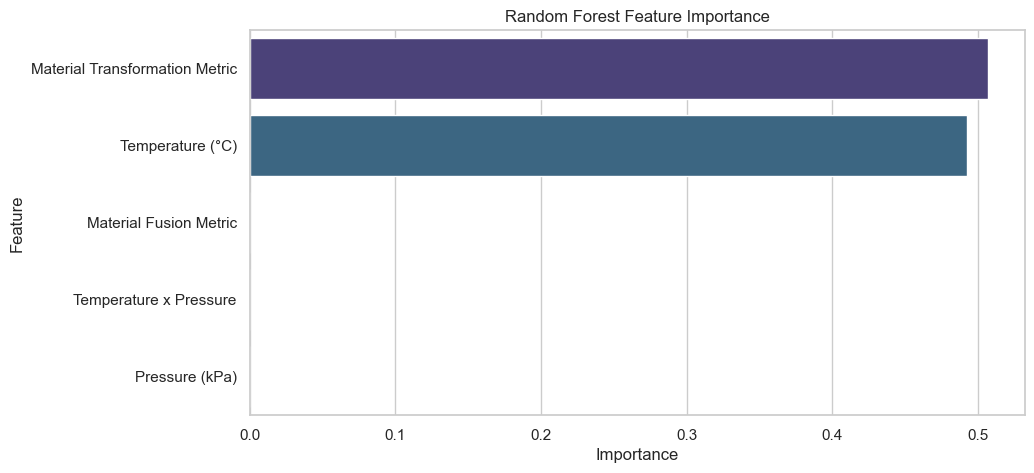

In [7]:
# Initialize the model
# n_estimators=100: Creates 100 decision trees
# random_state=67: Ensures reproducibility
rf_model = RandomForestRegressor(n_estimators=100, random_state=67)

# Start Timer
start_time = time.time()

# Train the model
rf_model.fit(X_train_scaled, y_train)

# End Timer
end_time = time.time()
rf_training_time = end_time - start_time

# Predict on test set
y_pred_rf = rf_model.predict(X_test_scaled)

# --- Evaluation Metrics ---
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("--- Random Forest Results ---")
print(f"Training Time: {rf_training_time:.6f} seconds")
print(f"RMSE: {rmse_rf:.4f}")
print(f"MAE:  {mae_rf:.4f}")
print(f"R^2:  {r2_rf:.4f}")

# --- Feature Importance ---
# Unlike coefficients, this shows how much a feature decreases impurity across trees.
# It captures non-linear importance.
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title('Random Forest Feature Importance')
plt.show()

## Model Evaluation

Model Performance Comparison:


,Metric,Linear Regression,Random Forest
0,RMSE (Lower is better),9.955028,0.094248
1,MAE (Lower is better),5.668298,0.018436
2,R^2 (Higher is better),0.514561,0.999956
3,Training Time (s),0.022279,1.277601


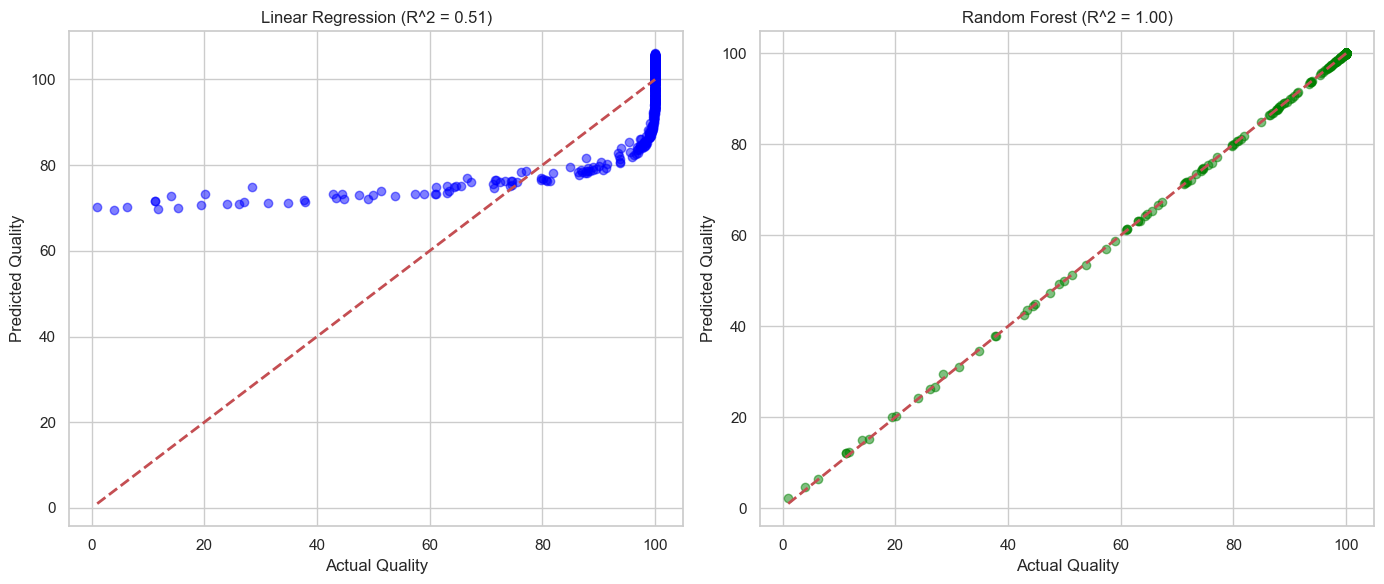

In [7]:
# Create a comparison dataframe
comparison_df = pd.DataFrame({
    'Metric': ['RMSE (Lower is better)', 'MAE (Lower is better)', 'R^2 (Higher is better)', 'Training Time (s)'],
    'Linear Regression': [rmse_lr, mae_lr, r2_lr, lr_training_time],
    'Random Forest': [rmse_rf, mae_rf, r2_rf, rf_training_time]
})

print("Model Performance Comparison:")
display(comparison_df)

# Visualization of Predictions vs Actuals
plt.figure(figsize=(14, 6))

# Plot Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, alpha=0.5, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title(f'Linear Regression (R^2 = {r2_lr:.2f})')

# Plot Random Forest
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title(f'Random Forest (R^2 = {r2_rf:.2f})')

plt.tight_layout()
plt.show()

Model Performance Comparison:


,Metric,Linear Regression,Random Forest
0,RMSE (Lower is better),9.955028,0.094248
1,MAE (Lower is better),5.668298,0.018436
2,R^2 (Higher is better),0.514561,0.999956
3,Training Time (s),0.021981,1.238698


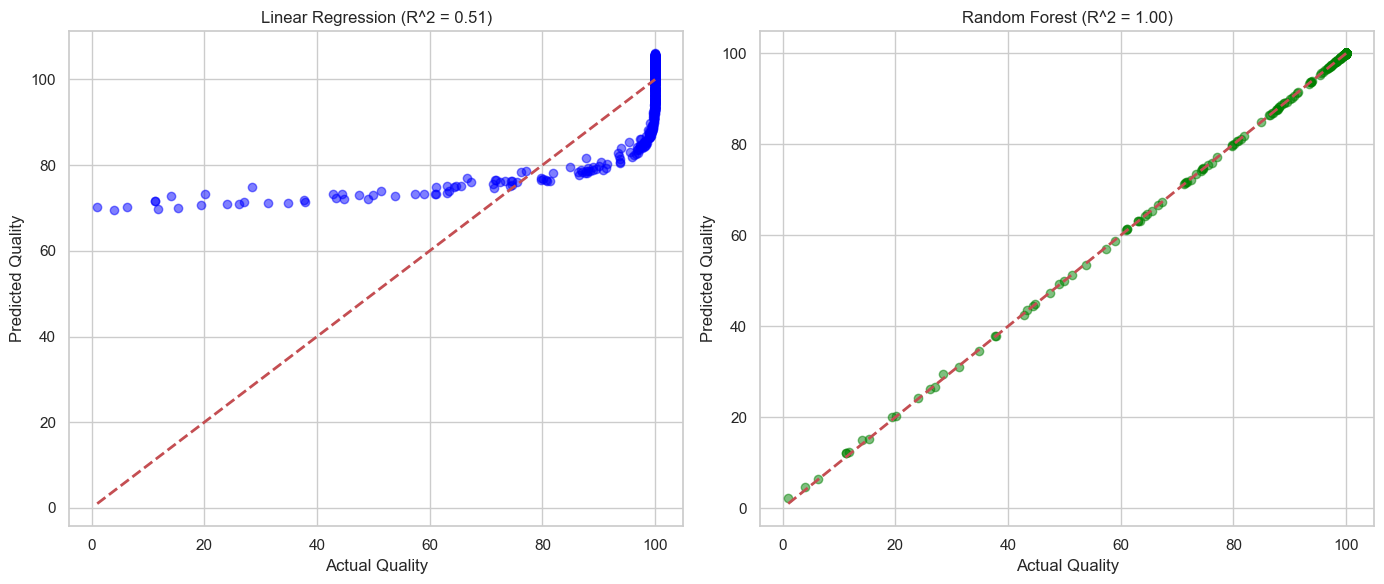


--- 5-Fold Cross-Validation Results ---
Linear Regression CV Average RMSE: 8.9288 (+/- 0.3898)
Random Forest CV Average RMSE:     0.1167 (+/- 0.0270)


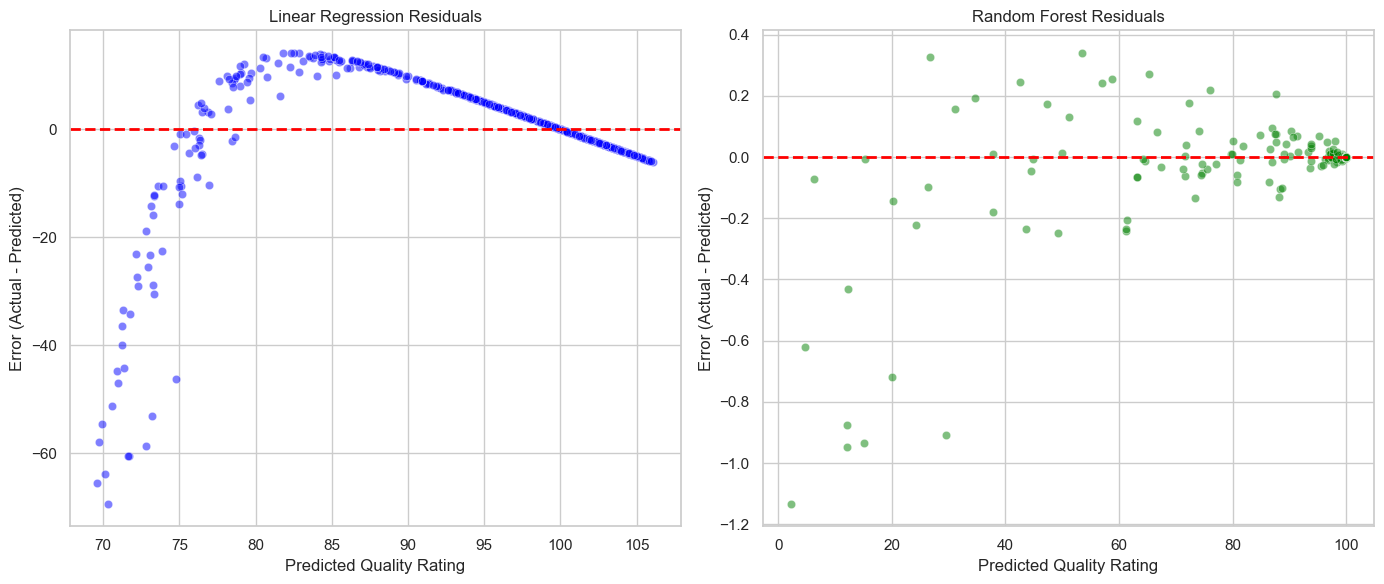


--- Real-World Applicability: Tolerance Test ---
Percentage of predictions within +/- 1.0 point of actual quality:
Linear Regression: 10.98%
Random Forest:     99.87%


In [ ]:
# --- A. Direct Metric Comparison ---
comparison_df = pd.DataFrame({
    'Metric': ['RMSE (Lower is better)', 'MAE (Lower is better)', 'R^2 (Higher is better)', 'Training Time (s)'],
    'Linear Regression': [rmse_lr, mae_lr, r2_lr, lr_training_time],
    'Random Forest': [rmse_rf, mae_rf, r2_rf, rf_training_time]
})

print("Model Performance Comparison:")
display(comparison_df)

# --- B. Predictions vs Actuals Plot ---
# Ideally, points should fall exactly on the red diagonal line.
plt.figure(figsize=(14, 6))

# Plot Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, alpha=0.5, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2) # Identity line
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title(f'Linear Regression (R^2 = {r2_lr:.2f})')

# Plot Random Forest
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2) # Identity line
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title(f'Random Forest (R^2 = {r2_rf:.2f})')

plt.tight_layout()
plt.show()

# --- C. Cross-Validation (Robustness Check) ---
print("\n--- 5-Fold Cross-Validation Results ---")
# This tests the model on 5 different splits of data to ensure the score isn't a fluke.
# We use negative MSE because sklearn optimization minimizes cost functions.

cv_scores_lr = cross_val_score(lr_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_lr = np.sqrt(-cv_scores_lr)
print(f"Linear Regression CV Average RMSE: {cv_rmse_lr.mean():.4f} (+/- {cv_rmse_lr.std():.4f})")

cv_scores_rf = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_rf = np.sqrt(-cv_scores_rf)
print(f"Random Forest CV Average RMSE:     {cv_rmse_rf.mean():.4f} (+/- {cv_rmse_rf.std():.4f})")

# --- D. Residual Analysis ---
# Residuals = Actual - Predicted. 
# Patterns in residuals imply the model missed underlying trends.
residuals_lr = y_test - y_pred_lr
residuals_rf = y_test - y_pred_rf

plt.figure(figsize=(14, 6))

# LR Residuals
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_pred_lr, y=residuals_lr, alpha=0.5, color='blue')
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.title('Linear Regression Residuals')
plt.xlabel('Predicted Quality Rating')
plt.ylabel('Error (Actual - Predicted)')

# RF Residuals
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_pred_rf, y=residuals_rf, alpha=0.5, color='green')
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.title('Random Forest Residuals')
plt.xlabel('Predicted Quality Rating')
plt.ylabel('Error (Actual - Predicted)')

plt.tight_layout()
plt.show()

# --- E. Real-World Tolerance Test ---
# Calculates the percentage of predictions that fell within +/- 1.0 of the actual rating.
tolerance = 1.0  
lr_accuracy = np.mean(np.abs(residuals_lr) < tolerance) * 100
rf_accuracy = np.mean(np.abs(residuals_rf) < tolerance) * 100

print("\n--- Real-World Applicability: Tolerance Test ---")
print(f"Percentage of predictions within +/- {tolerance} point of actual quality:")
print(f"Linear Regression: {lr_accuracy:.2f}%")
print(f"Random Forest:     {rf_accuracy:.2f}%")